This code is based on the documentation of Ouverture using Lonboard: https://docs.overturemaps.org/examples/lonboard/

In [42]:
import geopandas as gpd
import numpy as np
import overturemaps

from lonboard import Map, ScatterplotLayer
from lonboard.basemap import CartoBasemap
from shapely import wkb
from overturemaps import core

import osmnx as ox

In [3]:
bangalore = ox.geocode_to_gdf("Bangalore, India")

<Axes: >

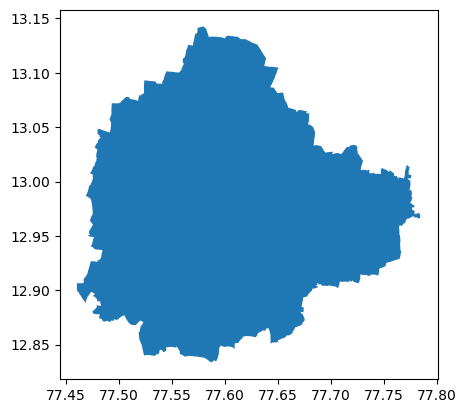

In [4]:
bangalore.plot()

In [5]:
boundaries = bangalore.geometry.unary_union

In [6]:
long_lat_boundaries = boundaries.bounds

In [7]:
long_lat_boundaries

(77.4600507, 12.8336251, 77.7843613, 13.1426598)

In [8]:
bbox = long_lat_boundaries

In [9]:
# This throws an error - need to log ticket
# gdf = core.geodataframe("place", bbox=bbox)

In [10]:
# Do longer route
table = overturemaps.record_batch_reader("place", bbox).read_all()
table = table.combine_chunks()

In [11]:
table

pyarrow.Table
id: string
geometry: binary
bbox: struct<xmin: float, xmax: float, ymin: float, ymax: float>
  child 0, xmin: float
  child 1, xmax: float
  child 2, ymin: float
  child 3, ymax: float
version: int32
sources: list<element: struct<property: string, dataset: string, record_id: string, update_time: string, confidence: double>>
  child 0, element: struct<property: string, dataset: string, record_id: string, update_time: string, confidence: double>
      child 0, property: string
      child 1, dataset: string
      child 2, record_id: string
      child 3, update_time: string
      child 4, confidence: double
names: struct<primary: string, common: map<string, string ('common')>, rules: list<element: struct<variant: string, language: string, value: string, between: list<element: double>, side: string>>>
  child 0, primary: string
  child 1, common: map<string, string ('common')>
      child 0, common: struct<key: string not null, value: string> not null
          child 0, key:

In [12]:
# convert to dataframe
df = table.to_pandas()

In [13]:
# DataFrame to GeoDataFrame, set crs
gdf = gpd.GeoDataFrame(
    df,
    geometry=df['geometry'].apply(wkb.loads),
    crs="EPSG:4326"
)

In [14]:
gdf.shape

(117415, 14)

In [15]:
gdf.head()

,id,geometry,bbox,version,sources,names,categories,confidence,websites,socials,emails,phones,brand,addresses
0,08f601450331001d035e974c03daf427,POINT (77.46080 12.85074),"{'xmin': 77.4607925415039, 'xmax': 77.46080780...",0,"[{'property': '', 'dataset': 'meta', 'record_i...",{'primary': 'Indian Institute of Journalism an...,"{'primary': 'college_university', 'alternate':...",0.672152,[http://www.iijnm.org/],[https://www.facebook.com/146698565506013],None,[+108025432565],None,[{'freeform': 'Opposite Bgs International Resi...
1,08f6014503069880033e767c5e25b3b0,POINT (77.46227 12.84941),"{'xmin': 77.46226501464844, 'xmax': 77.4622726...",0,"[{'property': '', 'dataset': 'meta', 'record_i...",{'primary': 'BGS School Of Architecture & Plan...,"{'primary': 'college_university', 'alternate':...",0.541620,[http://bgssap.edu.in/],[https://www.facebook.com/1521568611428934],None,[+108028437582],None,[{'freeform': 'Bgs International Residential S...
2,08f60145038f262903667ae29bd1ef61,POINT (77.46915 12.84700),"{'xmin': 77.46914672851562, 'xmax': 77.4691619...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'TVS - Anjanadri Motors', 'common'...","{'primary': 'motorcycle_dealer', 'alternate': ...",0.672152,[http://www.tvsmotor.com],[https://www.facebook.com/113072547834860],None,[+919972130096],None,"[{'freeform': ' Main Road, near KH Circle, Kan..."
3,08f60145030ac148039fb3a3fe22a6d5,POINT (77.46658 12.85353),"{'xmin': 77.46656799316406, 'xmax': 77.4665832...",0,"[{'property': '', 'dataset': 'meta', 'record_i...","{'primary': 'Aikya Farm', 'common': None, 'rul...","{'primary': 'holiday_rental_home', 'alternate'...",0.672152,[https://www.airbnb.co.in/rooms/53283364?guest...,[https://www.facebook.com/104967985553342],None,[+919071135381],None,"[{'freeform': 'Bengaluru, KA, India', 'localit..."
4,08f6014503603c8c03dd6e0b4af0c050,POINT (77.46199 12.85963),"{'xmin': 77.46197509765625, 'xmax': 77.4619903...",0,"[{'property': '', 'dataset': 'meta', 'record_i...",{'primary': 'Vivekananda Institute of Technolo...,"{'primary': 'education', 'alternate': ['b2b_sc...",0.672152,[http://vitb.ac.in],[https://www.facebook.com/100757474967836],None,[+17625013435],None,"[{'freeform': 'Gudimaavu', 'locality': None, '..."


In [16]:
gdf.columns

Index(['id', 'geometry', 'bbox', 'version', 'sources', 'names', 'categories',
       'confidence', 'websites', 'socials', 'emails', 'phones', 'brand',
       'addresses'],
      dtype='object')

In [17]:
gdf.categories

0         {'primary': 'college_university', 'alternate':...
1         {'primary': 'college_university', 'alternate':...
2         {'primary': 'motorcycle_dealer', 'alternate': ...
3         {'primary': 'holiday_rental_home', 'alternate'...
4         {'primary': 'education', 'alternate': ['b2b_sc...
                                ...                        
117410    {'primary': 'ev_charging_station', 'alternate'...
117411    {'primary': 'public_service_and_government', '...
117412    {'primary': 'pet_boarding', 'alternate': ['pet...
117413        {'primary': 'real_estate', 'alternate': None}
117414    {'primary': 'coffee_shop', 'alternate': ['rest...
Name: categories, Length: 117415, dtype: object

Would be interesting to see what is in that! For later.

In [18]:
gdf.dropna(subset=['categories'], inplace=True)

In [19]:
gdf.shape

(111606, 14)

In [20]:
gdf['Type'] = gdf['categories'].apply(lambda x: x['primary'])

In [21]:
gdf_restaurant = gdf[gdf['Type'].str.contains('restaurant')]

In [22]:
gdf_restaurant.shape

(7702, 15)

<Axes: >

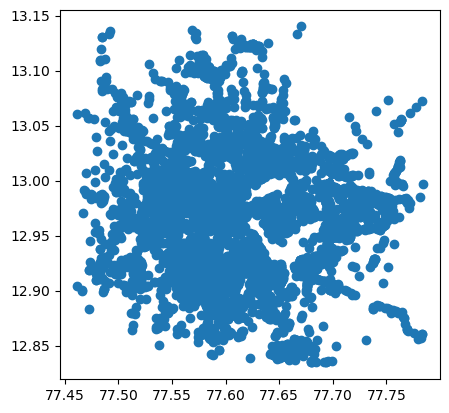

In [23]:
gdf_restaurant.plot()

In [37]:
layer = ScatterplotLayer.from_geopandas(
    gdf= gdf_restaurant[['id', 'geometry', 'names']].reset_index(drop=True),
    get_fill_color=[255, 0, 255],
    get_line_color=[255, 0, 255],
)

In [38]:
bangalore.centroid # Actually not the right way to do but quick and dirty for the time being

C:\Users\ellen\AppData\Local\Temp\ipykernel_132400\1506734033.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bangalore.centroid # Actually not the right way to do but quick and dirty for the time being


0    POINT (77.60301 12.97630)
dtype: geometry

In [47]:
view_state = {
    "longitude": 77.604675,
    "latitude": 12.975001,
    "zoom": 11,
    "pitch": 45,
}
m = Map(basemap_style=CartoBasemap.DarkMatter,layers = layer, view_state=view_state)
m

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…